### Which Factors Influence the Price of Health Insurance?

##### Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

## Import Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
df.shape

(1338, 7)

In [44]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [45]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [46]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We have 0 missing values which is very good. Now let's do EDA with some cool graphs :) First we'll see how the charges are distributed according to given factors

In [49]:
# We will analyse the Numerical Column using select dtypes:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [50]:
# We will analyse the Categorical Column using select dtypes:
cat_cols = df.select_dtypes(include="object").columns
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

### Visualization

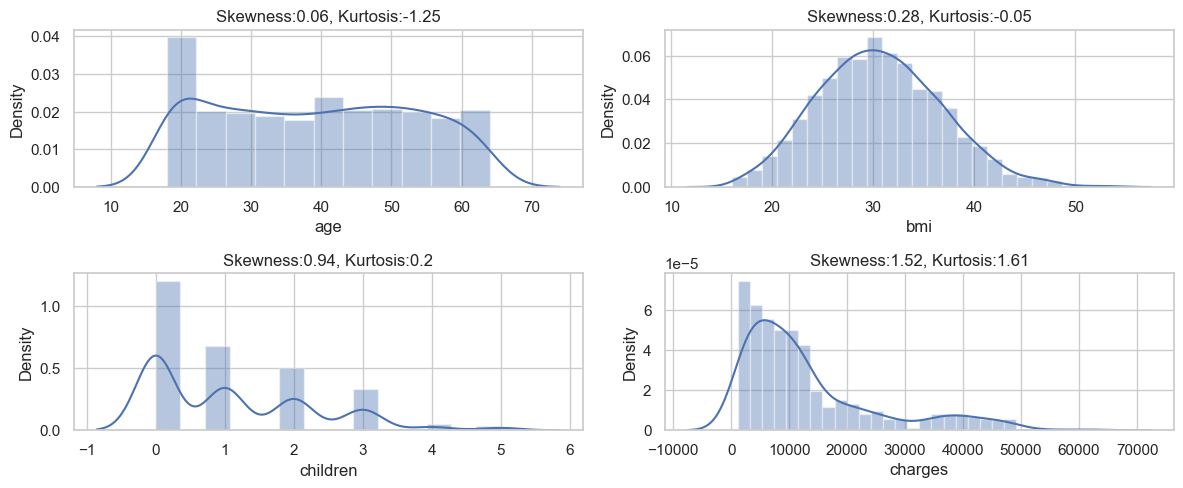

In [65]:
# Univariate Analysis For Numerical Features:
plt.figure(figsize=(12,7))
t = 1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(df[i])
    plt.title(f"Skewness:{df[i].skew().round(2)}, Kurtosis:{df[i].kurt().round(2)}")
    t+=1
plt.tight_layout()
plt.show()

The density plots show that:

* Age, BMI, and children have some right-skewness, indicating a few individuals with extreme values.
* Charges have a strong right-skewness and heavy tails, indicating many low charges and a few extremely high charges.
* Kurtosis varies across variables, with some being flatter (platykurtic) and others having heavier tails (leptokurtic).

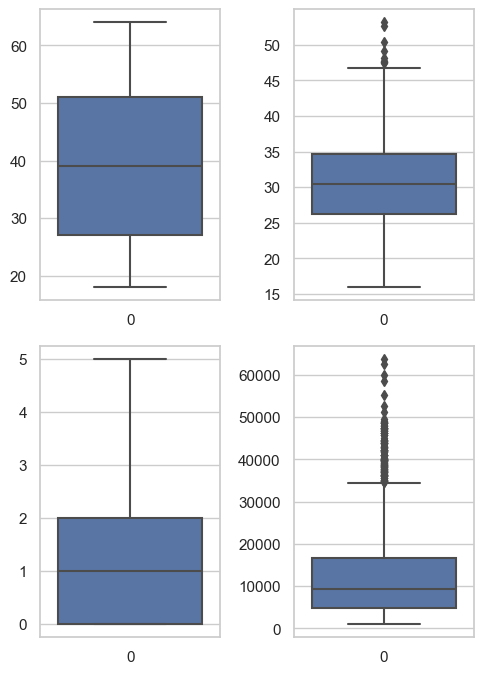

In [66]:
# Univariate Analysis For Numerical Features:
plt.figure(figsize=(5,10))
t = 1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(df[i])
    t+=1
plt.tight_layout()
plt.show()

Inferences from the Box Plots:

* Age, BMI, and children have relatively small IQRs and a few outliers, especially on the higher end.
* Charges have a large IQR and numerous outliers on the higher end, indicating a wide spread of the middle 50% of the data and many extreme high charges.
* Median values are within expected ranges for age, BMI, and children, while charges have a higher median.

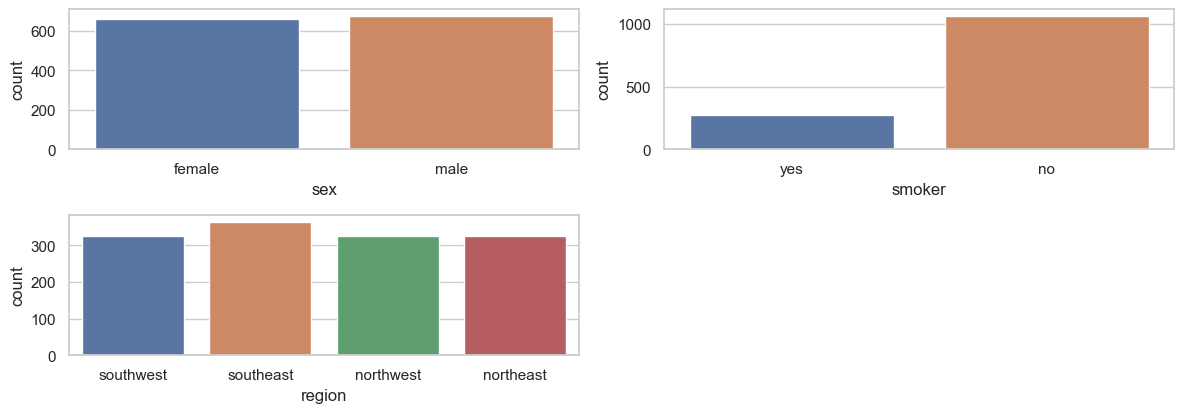

In [67]:
# Univariate Analysis For Categorical Features:
plt.figure(figsize=(12,10))
t = 1
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.countplot(data = df,x= i)
    t+=1
plt.tight_layout()
plt.show()

Inferences from the Count Plots:

* Sex: More females than males.
* Smoker: More non-smokers than smokers.
* Region: "Southeast" has the highest number of individuals, followed by "southwest," "northwest," and "northeast."

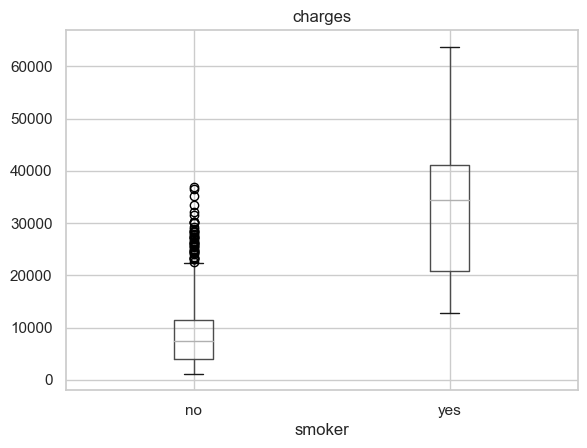

In [68]:
#Visualizing the  charges  considering whether people is smoker or not 
df.boxplot(column='charges',by='smoker')
plt.suptitle("")
plt.show()

Inferences from the Box Plot:

* Smokers have higher median charges and a wider range of costs than non-smokers.
* Smokers are more likely to have extremely high charges.

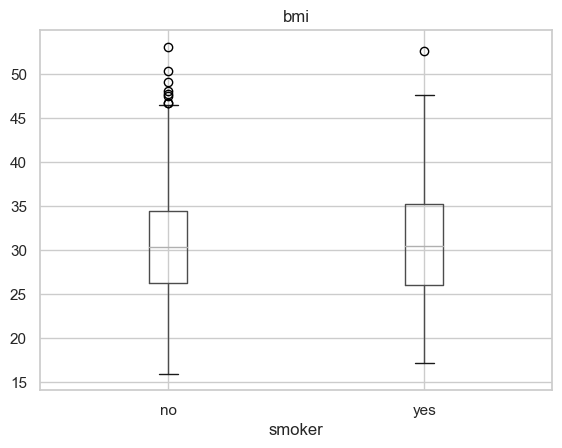

In [70]:
#Visualizing the  BMI considering whether people is smoker or not
df.boxplot(column='bmi',by='smoker')
plt.suptitle("")
plt.show()

Inferences from the Box Plot:

* Smokers have slightly higher median BMI than non-smokers.
* Smokers have a slightly wider range of BMI values.
* Both groups have a few outliers.

Text(0.5, 1.0, 'Distribution of Charges')

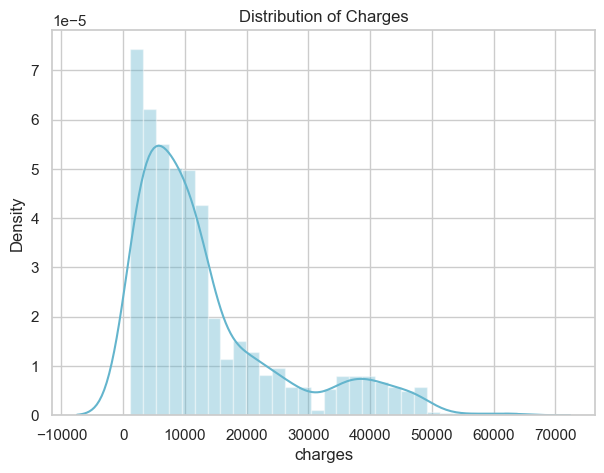

In [63]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(7,5))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

This distribution is right-skewed. To make it closer to normal we can apply natural log

Inferences from the Density Plot:

* Charges are heavily skewed to the right, with a long tail representing a small number of individuals with extremely high charges.
* There are more extreme values (outliers) than would be expected in a normal distribution.

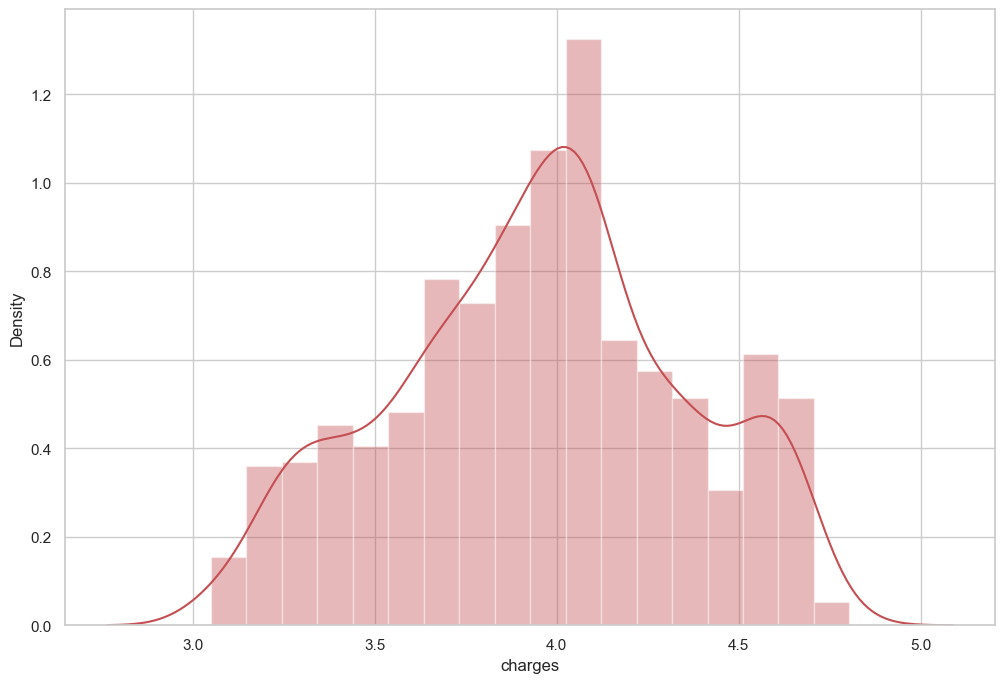

In [76]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

Inferences from the Density Plot:

* Charges are moderately skewed to the right, with a longer tail to the right.
* The distribution is similar to a normal distribution in terms of kurtosis.

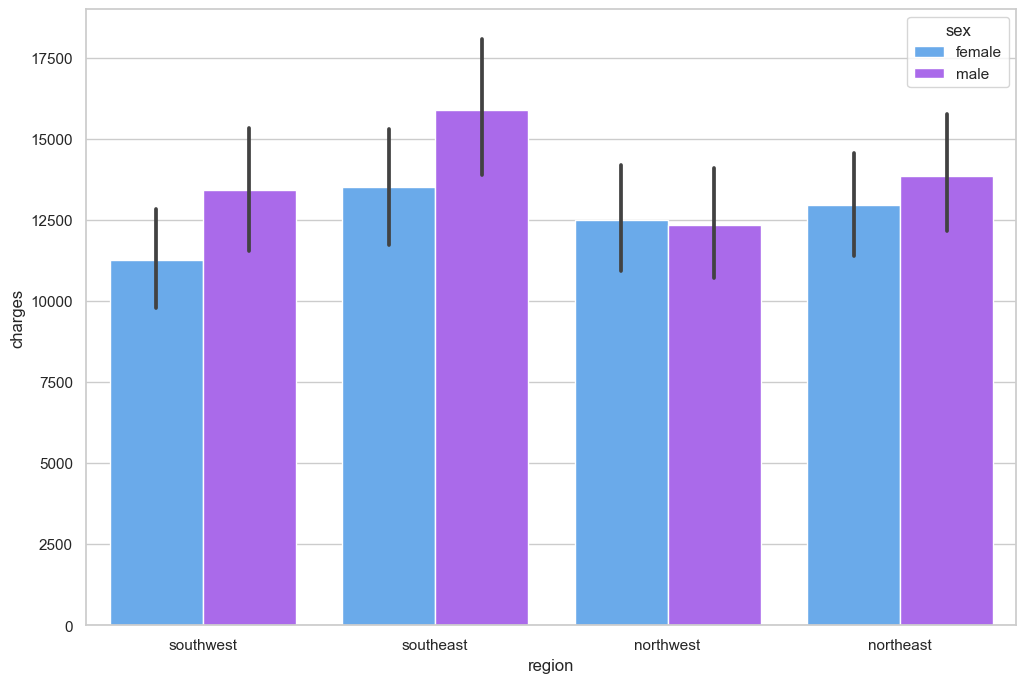

In [77]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

Inferences from the Bar Plot:

* Region: Charges vary significantly across regions, with southeast having higher charges and southwest having lower charges.
* Sex: Males generally have higher charges than females.
* Interaction: The effect of gender on charges appears to be influenced by region.

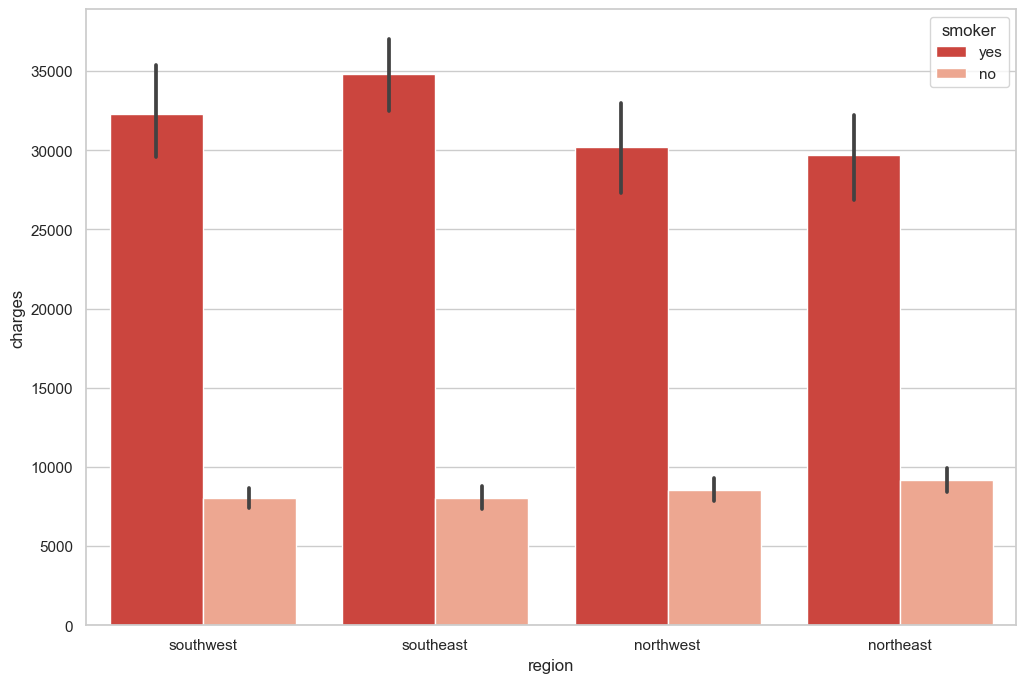

In [78]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

Inferences from the Bar Plot:

* Smoker status has a strong effect on charges, with smokers paying significantly more than non-smokers.
* Regional differences in charges are less pronounced.


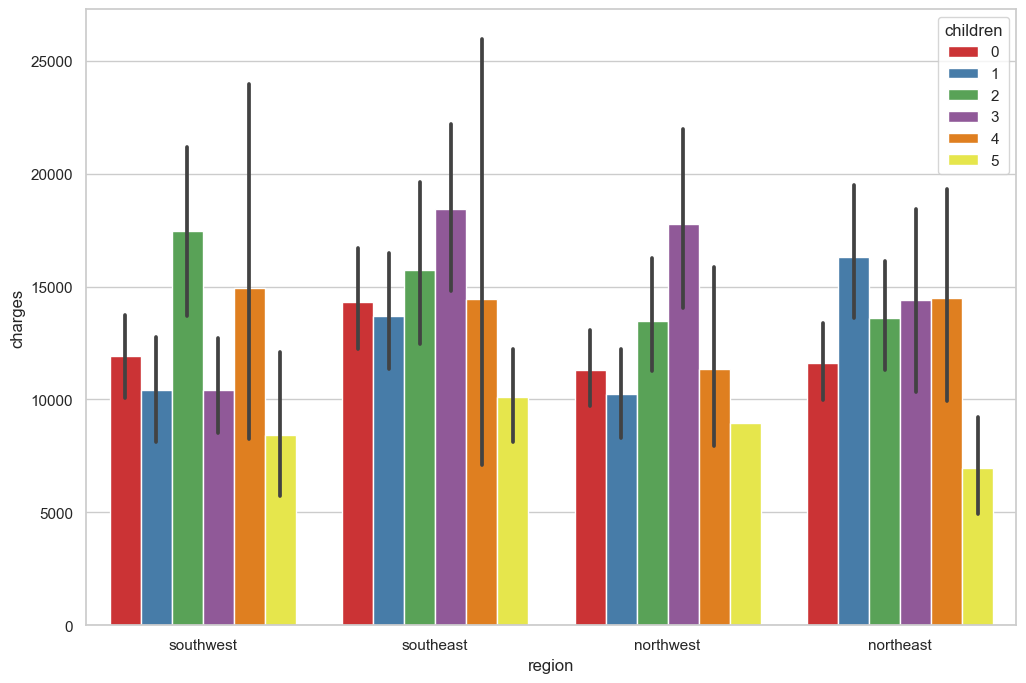

In [22]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

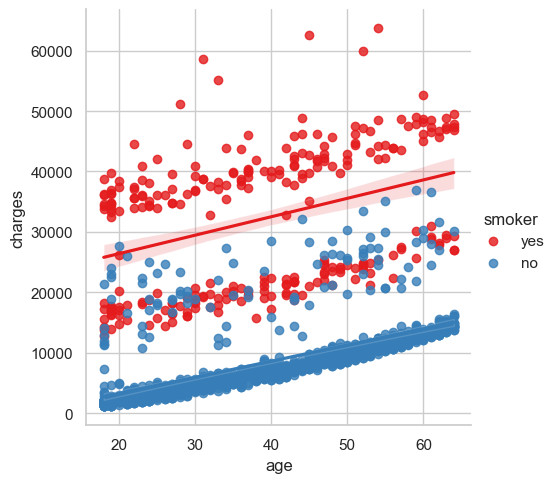

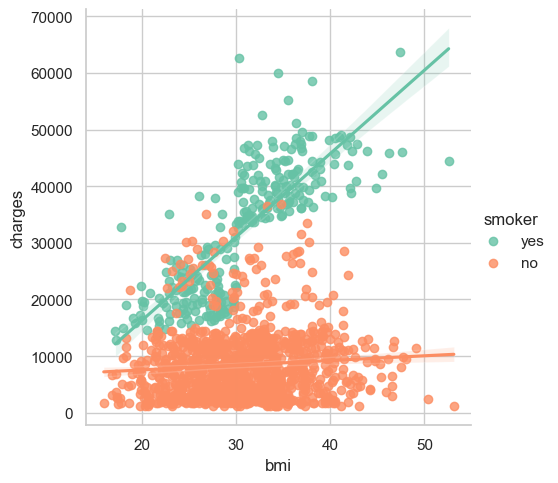

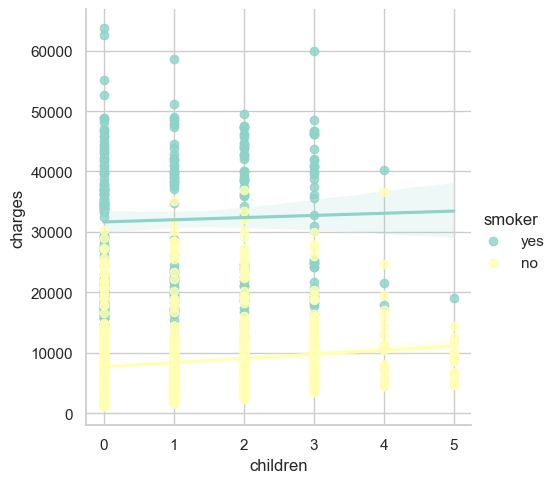

In [23]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

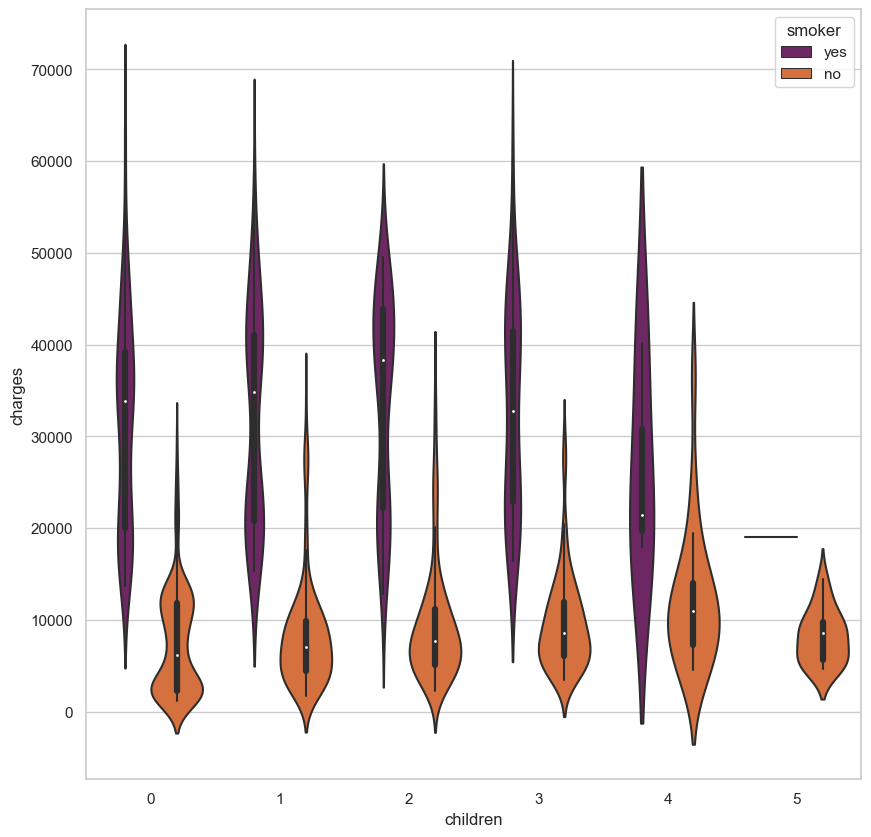

In [24]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

In [25]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [26]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

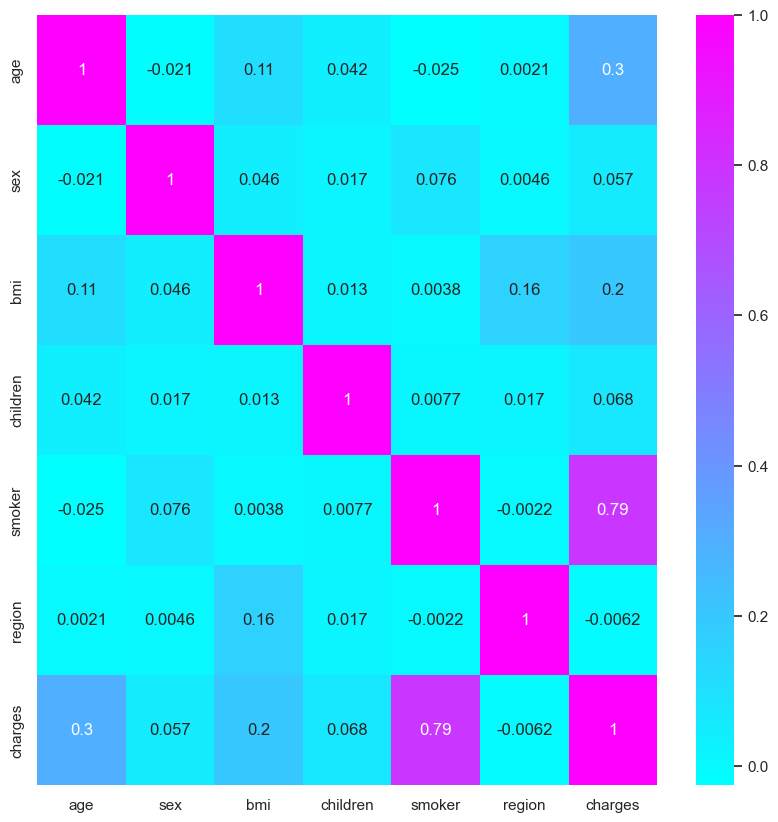

In [27]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

No correlation, except with the smoking

### Linear Regression

In [28]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.983908824403
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


The result we got is good enough, but we can try to improve it a bit by reducing unimportant features later

### Ridge Regression



In [29]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.440927495807
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063138



### Lasso Regression



In [31]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.838929039533
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224705


### Random Forest Regressor


In [79]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100,random_state = 1,n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred),
       metrics.r2_score(y_test,x_test_pred)))

MSE train data: 3738781.747, MSE test data: 21893323.009
R2 train data: 0.974, R2 test data: 0.862


Inferences from the Code Snippets:

* Ridge and Lasso: Both achieved good performance, with Lasso potentially performing feature selection.
* Random Forest: Achieved a slightly higher R-squared on the test data but might be overfitting.
* Consider: Other metrics, feature importances, and hyperparameter tuning for further evaluation.

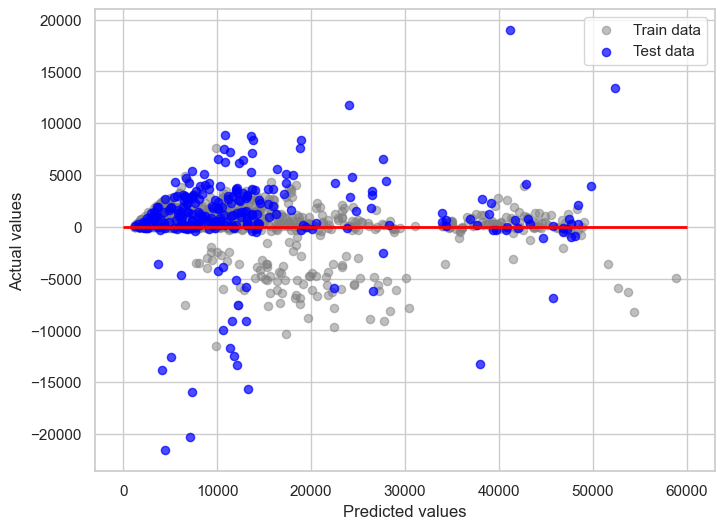

In [36]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218831)
3.age(0.136943)
4.children(0.020990)
5.region(0.015165)
6.sex(0.006393)


<BarContainer object of 6 artists>

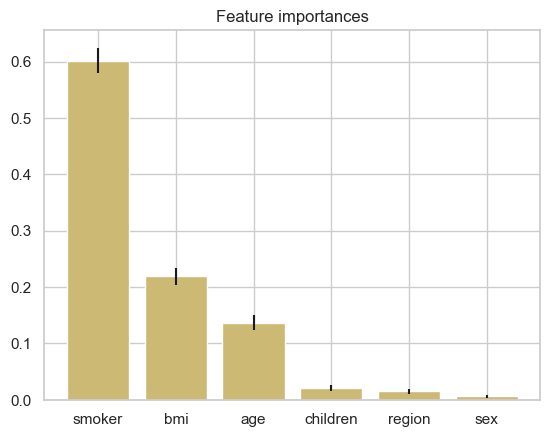

In [37]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")


### Polynomial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.881705252794
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345231


In [39]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.495045477648
Mean Squared Error: 18895160.09878035
Root Mean Squared Error: 4346.856346692441


In [40]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268


#### Conclusion: like we previously noticed smoking is the greatest factor that affects medical cost charges, then it's bmi and age. Polynomial Regression turned out to be the best model

### Thank You